## Capstone project
* Goals
  * Data extraction
      * Download a publicly available dataset. 
      * Describe the dataset 
      * Describe what question you intend to answer with the dataset
  * Data cleanup
      * Write a script/function to clean up the dataset. 
      * This might involve
        - cleaning up columns
        - removing/filling missing data
  * Data visualization
      * Visualize important dimensions of the data
      * Outline a few trends you can see 
  * Descriptive/Predictive analytics
      * Draw conclusions from the data
          * This can based on descriptive statistics and/or visualization
          * Predictive models (preferred) and carries 10 extra points.public
 

* Data Resources:
https://www.kaggle.com/harlfoxem/housesalesprediction

Downloading the dataset named kc_house_data.csv.

In [87]:
import pandas as pd
import numpy as np
import time

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df= pd.read_csv('House Sales in King County, USA.csv', header=0)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Columns interpretation
	id: a notation for a house
	date: Date house was sold
	price: Price is prediction target
	bedrooms: Number of Bedrooms/House
	bathrooms: Number of bathrooms/bedrooms
	sqft_living: square footage of the home
	sqft_lot: square footage of the lot
	floors: Total floors (levels) in house
	waterfront: House which has a view to a waterfront
	view: Has been viewed
	condition: How good the condition is ( Overall )
	grade: overall grade given to the housing unit, based on King County grading system
	sqft_above: square footage of house apart from basement
	sqft_basement: square footage of the basement
	yr_built: Built Year
	yr_renovated: Year when house was renovated
	zipcode: zip
	lat: Latitude coordinate
	long: Longitude coordinate
	sqft_living15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
    sqft_lot15: lotSize area in 2015(implies-- some renovations)

# EDA

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [91]:
df.shape

(21613, 21)

These group of data contains 21613 rows and 21 columns, though some part of the features are redundant which means I am supposed to delete or integrate them.

First of all, we need to define our object: the output.

In [92]:
df['OUTPUT'] = df.price

C:\Users\sam\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


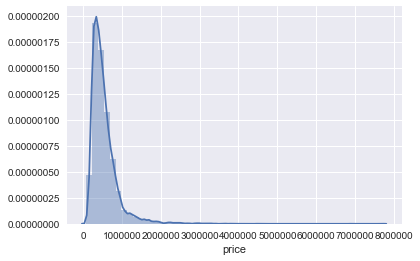

In [93]:
sns.distplot(df.price) #the distribution of output.

Afterward, we are supposed to figure out the distribution, the type, and the missing value issue for each feature. The quick overview of the data (columns, variable type, and non-null values). We can see that all columns are completely filled. I will need to take this into account when I design features. Meanwhile, we see that there are a lot of categorical (non-numeric) variables.

In [94]:
df.isnull().sum() #number of null for each variable

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
OUTPUT           0
dtype: int64

In [95]:
#the number of unique value for each column (if it's less than 30, print them out):
for c in list(df.columns):
    n = df[c].unique()
    if len(n)<30:
        print(c+': '+str(len(n))+' unique values'+'; '+str(n))
    else:
        print(c+': '+str(len(n))+' unique values')

id: 21436 unique values
date: 372 unique values
price: 4028 unique values
bedrooms: 13 unique values; [ 3  2  4  5  1  6  7  0  8  9 11 10 33]
bathrooms: 30 unique values
sqft_living: 1038 unique values
sqft_lot: 9782 unique values
floors: 6 unique values; [1.  2.  1.5 3.  2.5 3.5]
waterfront: 2 unique values; [0 1]
view: 5 unique values; [0 3 4 2 1]
condition: 5 unique values; [3 5 4 1 2]
grade: 12 unique values; [ 7  6  8 11  9  5 10 12  4  3 13  1]
sqft_above: 946 unique values
sqft_basement: 306 unique values
yr_built: 116 unique values
yr_renovated: 70 unique values
zipcode: 70 unique values
lat: 5034 unique values
long: 752 unique values
sqft_living15: 777 unique values
sqft_lot15: 8689 unique values
OUTPUT: 4028 unique values


In [96]:
df.describe(include ='all') #descriptive statistics

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,OUTPUT
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,5.400881e+05
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,3.671272e+05
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.500000e+04
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,3.219500e+05
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05


# Feature preprocessing

In [97]:
df.groupby('yr_renovated').size().sort_values(ascending = False)

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
2000       35
2007       35
2004       26
1990       25
2006       24
2002       22
2009       22
1989       22
1991       20
2001       19
1998       19
1994       19
1993       19
2008       18
1987       18
2010       18
1984       18
1983       18
1999       17
1985       17
1986       17
1992       17
2015       16
1995       16
1988       15
        ...  
1978        6
1975        6
1981        5
1958        5
1964        5
1965        5
1973        5
1969        4
1972        4
1963        4
1960        4
1957        3
1945        3
1953        3
1956        3
1955        3
1976        3
1974        3
1971        2
1950        2
1946        2
1967        2
1940        2
1962        2
1959        1
1954        1
1951        1
1948        1
1944        1
1934        1
Length: 70, dtype: int64

In [98]:
a=df.groupby('yr_renovated').size().sort_values(ascending = False)[0]/len(df.yr_renovated)
print('The percentage of observations that never been renovated: {:.2%}'.format(a))

The percentage of observations that never been renovated: 95.77%


Since nearly 95.77% of observations are never renovated, we can generate a new column to represent this information in the binary outcome: 1 indicates being renovated, 0 indicates no renovation.

In [100]:
df['renovated'] = (df.yr_renovated != 0).astype('int')
print(df['renovated'].head())
print(df.yr_renovated.head())

0    0
1    1
2    0
3    0
4    0
Name: renovated, dtype: int32
0       0
1    1991
2       0
3       0
4       0
Name: yr_renovated, dtype: int64


Use boxplot to explore each categorical variable's distribution and compare each category within these features with the output: price, to figure out the relationship between them and price.

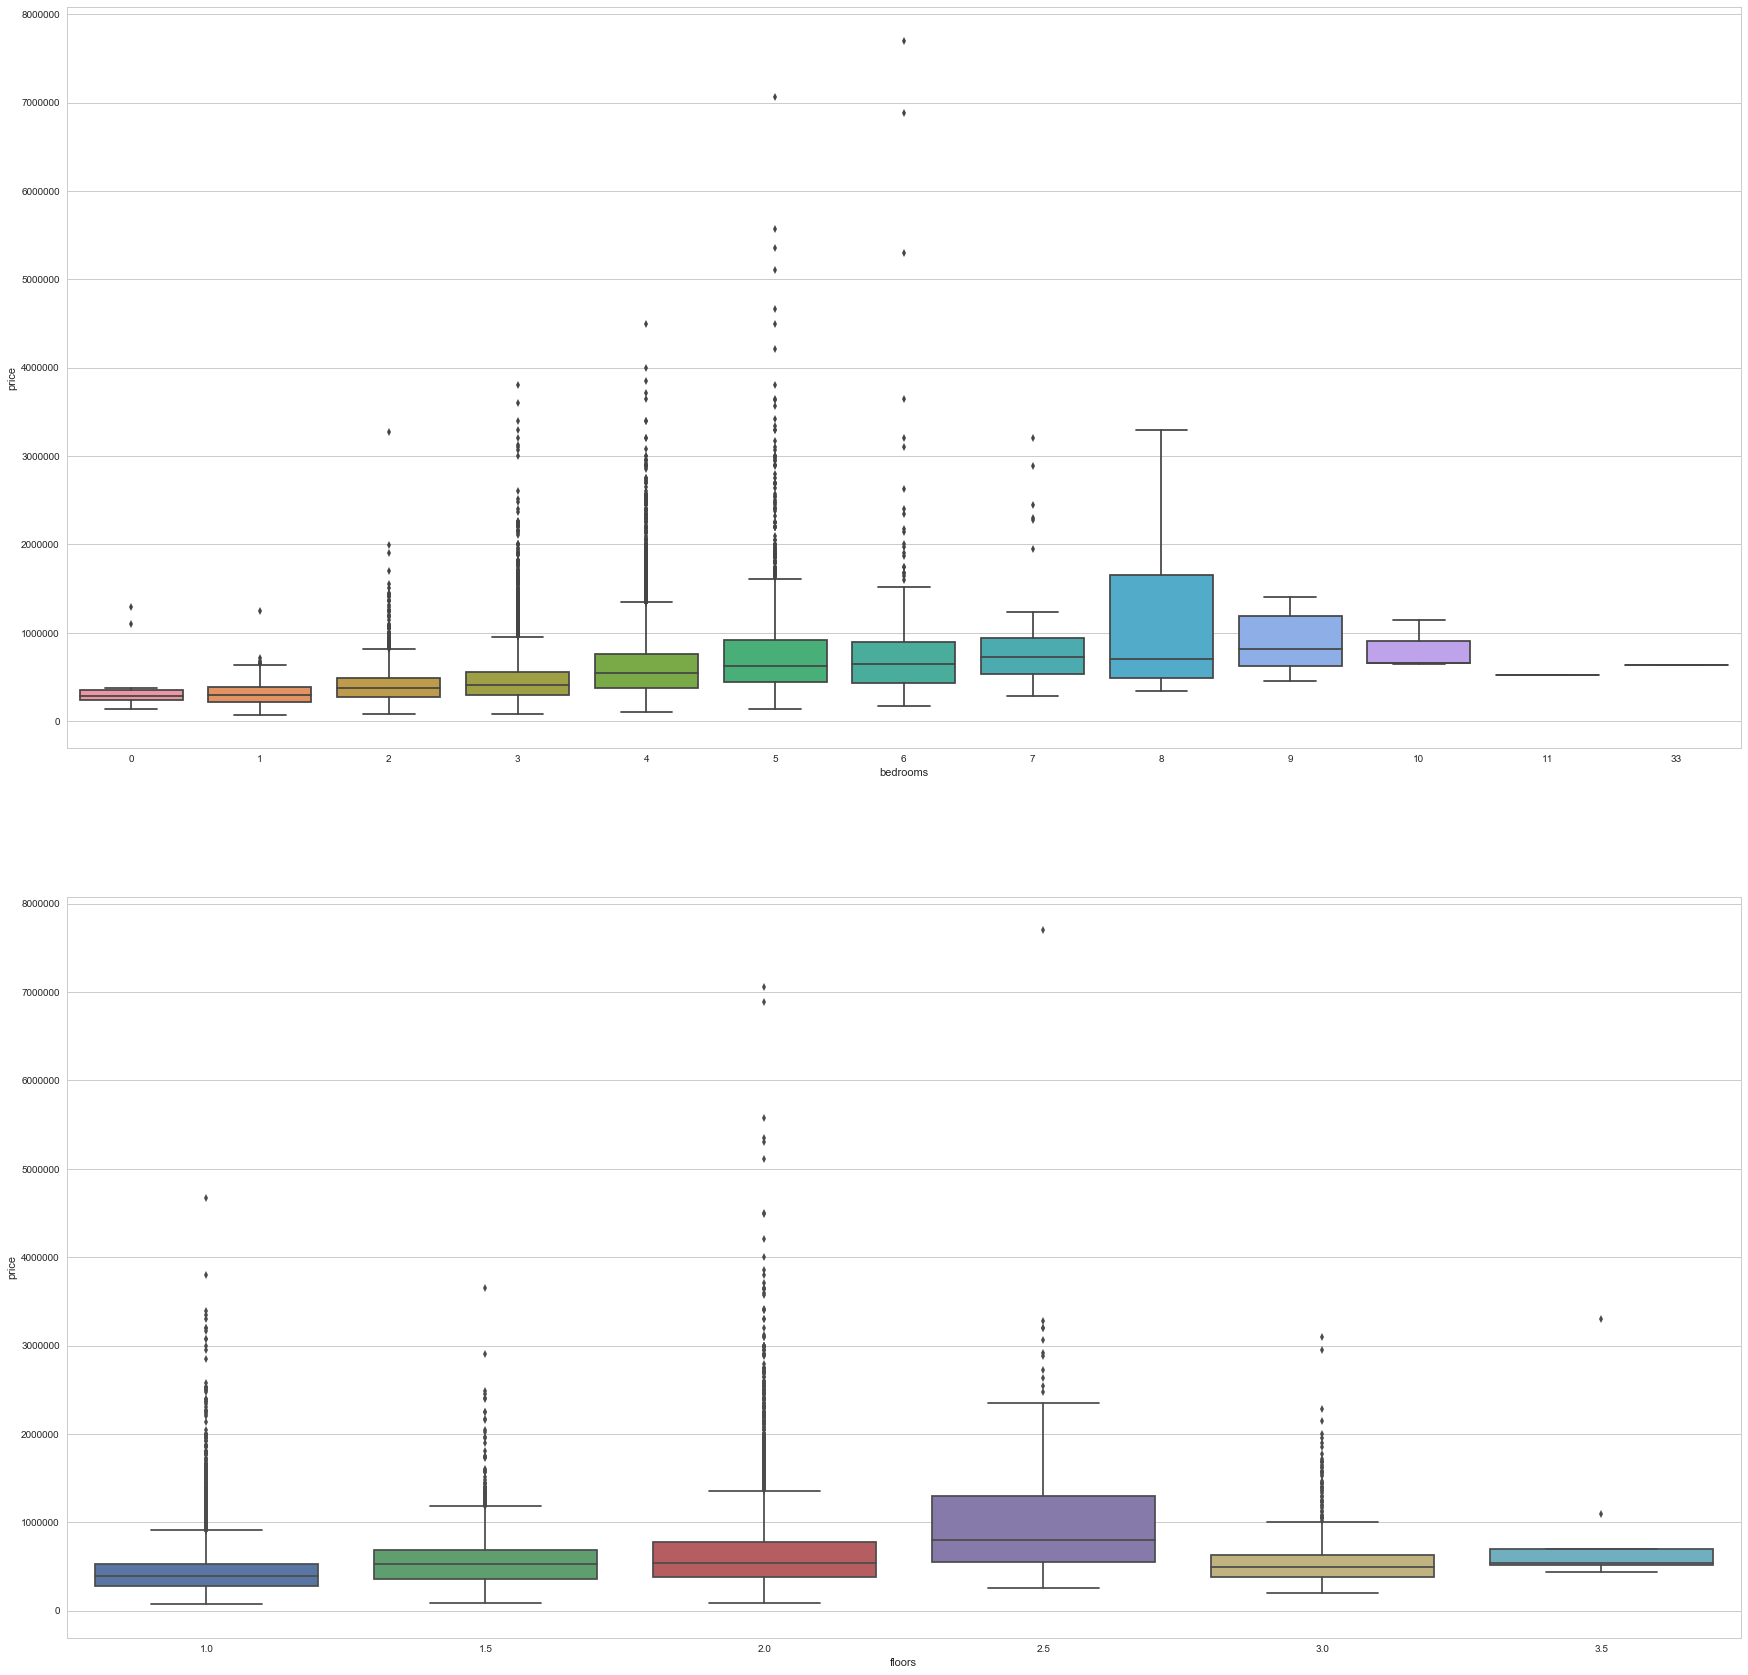

In [101]:
sns.set(style="whitegrid")
plt.figure(figsize=(30,30))
plt.subplot(211)
sns.boxplot(x="bedrooms", y='price', data = df)
plt.subplot(212)
sns.boxplot(x="floors", y='price', data = df)

It has a slight growth with the increase in the number of bedrooms and floors. 8 bedrooms and 2.5 floors are more desirable for customers.

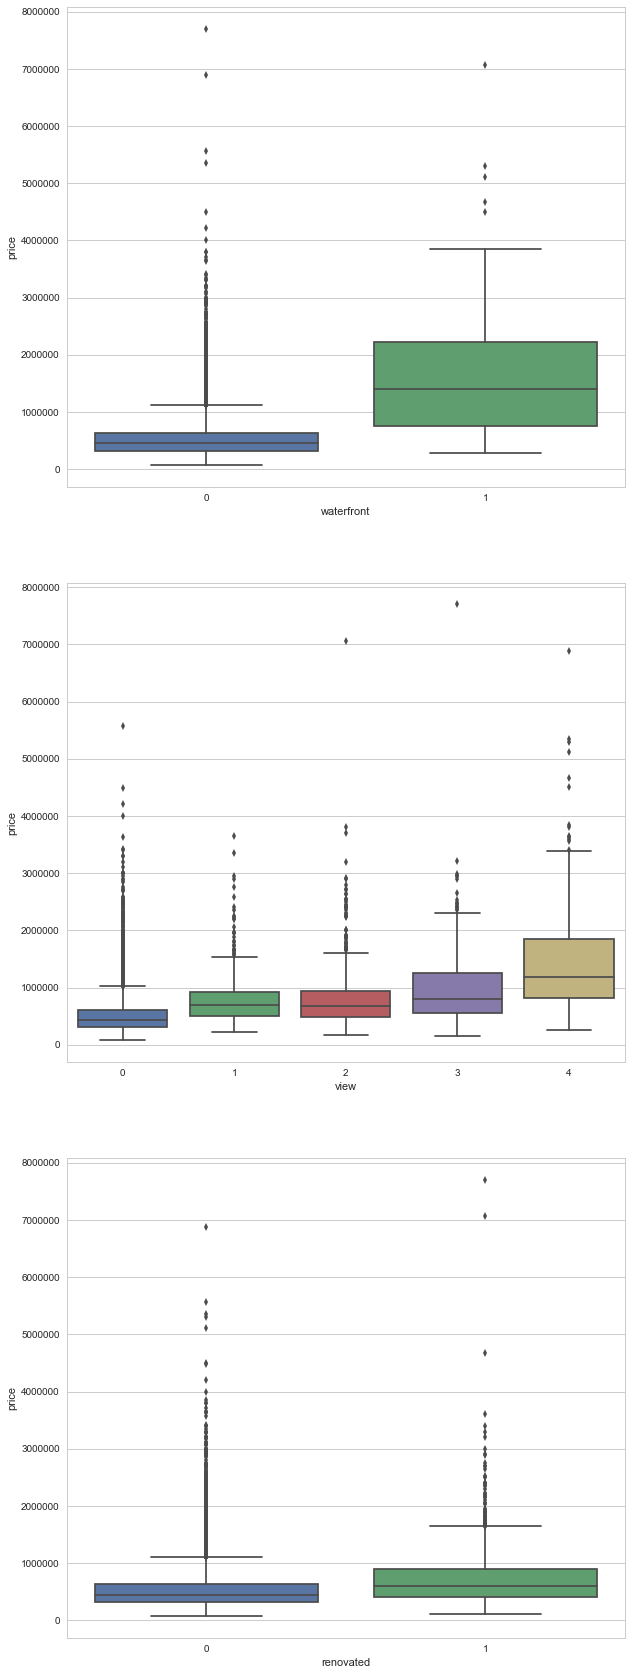

In [48]:
plt.figure(figsize=(10,30))
plt.subplot(311)
sns.boxplot(x="waterfront", y='price', data = df)

plt.subplot(312)
sns.boxplot(x="view", y='price', data = df)

plt.subplot(313)
sns.boxplot(x="renovated", y='price', data = df)

It has a dramatical growth for the price if the house has a view to a waterfront. However, it has a slight growth with the increase in the time of viewing and whether it's renovated or not. 4 times of viewing is more desirable for customers.

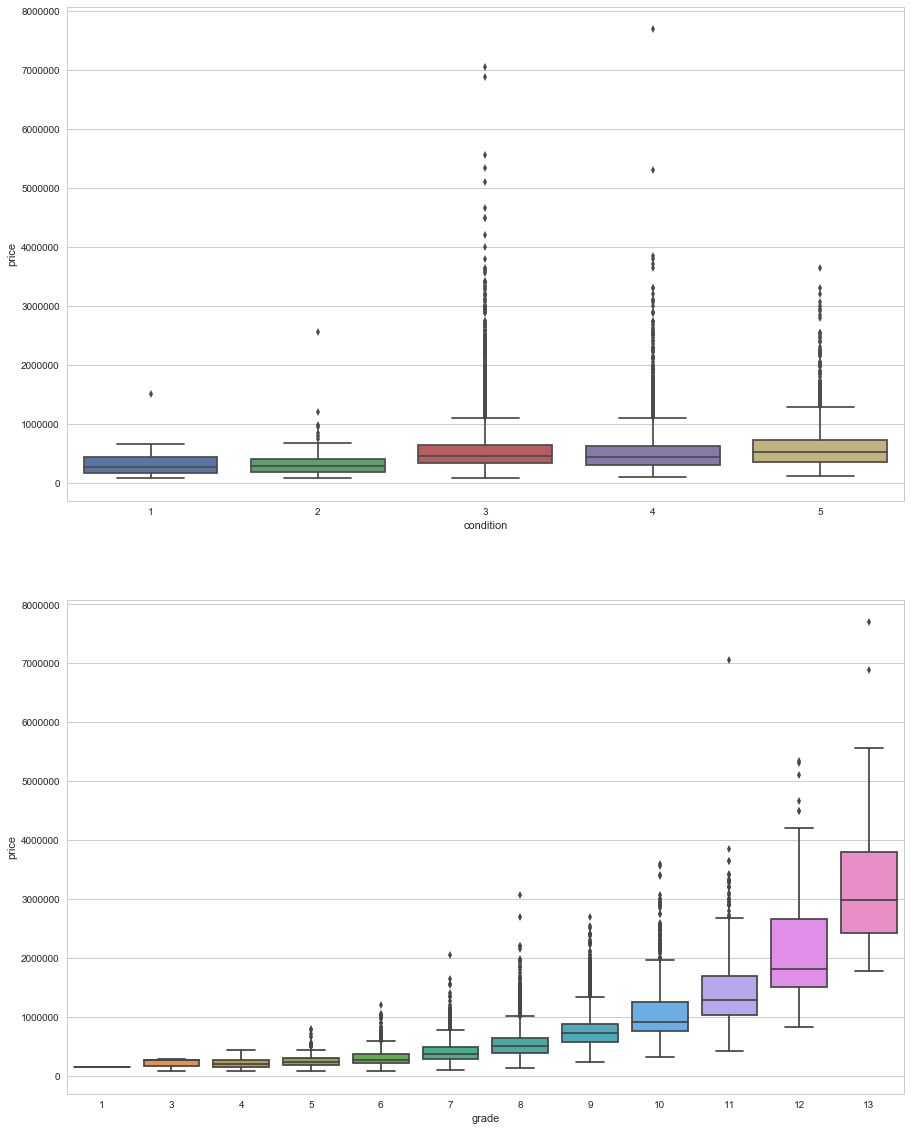

In [102]:
plt.figure(figsize=(15,20))
plt.subplot(211)
sns.boxplot(x="condition", y='price', data = df)

plt.subplot(212)
sns.boxplot(x="grade", y='price', data = df)

It has a significant growth for the price with the increase of grade which is the overall grade given to the housing unit, based on the King County grading system. By contrast, there is no such significant change for the price with the variation of the condition which is how good the condition is (Overall).

# Feature engineering

In [103]:
for c in list(df.columns):
    n = df[c].unique()
    if len(n)<30:
        print(c+': '+str(len(n))+' unique values'+'; '+str(n))
    else:
        print(c+': '+str(len(n))+' unique values')

id: 21436 unique values
date: 372 unique values
price: 4028 unique values
bedrooms: 13 unique values; [ 3  2  4  5  1  6  7  0  8  9 11 10 33]
bathrooms: 30 unique values
sqft_living: 1038 unique values
sqft_lot: 9782 unique values
floors: 6 unique values; [1.  2.  1.5 3.  2.5 3.5]
waterfront: 2 unique values; [0 1]
view: 5 unique values; [0 3 4 2 1]
condition: 5 unique values; [3 5 4 1 2]
grade: 12 unique values; [ 7  6  8 11  9  5 10 12  4  3 13  1]
sqft_above: 946 unique values
sqft_basement: 306 unique values
yr_built: 116 unique values
yr_renovated: 70 unique values
zipcode: 70 unique values
lat: 5034 unique values
long: 752 unique values
sqft_living15: 777 unique values
sqft_lot15: 8689 unique values
OUTPUT: 4028 unique values
renovated: 2 unique values; [0 1]


Choose the important features we'll use to build a model for predicting the output. Separate them into the three groups: categorical variables, categorical variables with numerical data, numerical variables.

In [104]:
cat=['waterfront','renovated']
cat_num=['floors','view','condition','grade']
num=['bedrooms','bathrooms','sqft_living','sqft_lot','sqft_above','sqft_basement',
     'yr_built','zipcode','lat','long','sqft_living15','sqft_lot15']

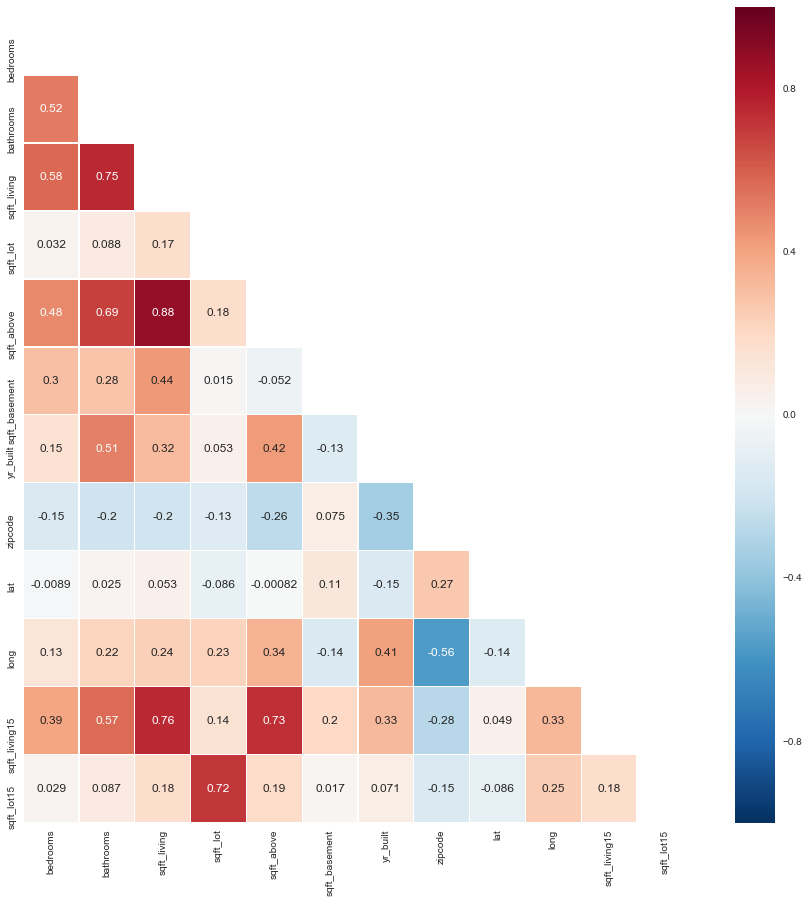

In [105]:
mask = np.zeros_like(df[num].corr()) 
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,15))
sns.heatmap(df[num].corr(),mask=mask,annot=True, vmin=-1, vmax=1, cmap="RdBu_r", linewidths=.25)

# PCA

PCA is effected by scale so we need to scale the features in our data before applying PCA.
While many algorithms (such as SVM, K-nearest neighbors, and logistic regression) require features to be normalized, intuitively we can think of Principle Component Analysis (PCA) as being a prime example of when normalization is important. Use StandardScaler to help me standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.

In [106]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(df[num])

import pickle
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))
scaler = pickle.load(open(scalerfile, 'rb'))

df_num_tf = scaler.transform(df[num])

In [107]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(df_num_tf) #Fit PCA on training set. I'm fitting PCA on the numerical features only.

print(pca)
pca.explained_variance_ratio_

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


array([3.55135817e-01, 1.63626292e-01, 1.27095974e-01, 8.31110096e-02,
       6.75589949e-02, 5.62066460e-02, 4.80033169e-02, 3.32996339e-02,
       2.56234992e-02, 2.27815414e-02, 1.75572755e-02, 1.14822772e-32])

The explained variance tells us how much information (variance) can be attributed to each of the principal components. Normally, we need to maintain at least 95% of information after conducting the principal component analysis. The code below has .95 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

In [108]:
pca = PCA(.95)
principalComponents = pca.fit_transform(df_num_tf)

pca.explained_variance_ratio_

array([0.35513582, 0.16362629, 0.12709597, 0.08311101, 0.06755899,
       0.05620665, 0.04800332, 0.03329963, 0.0256235 ])

In [109]:
pca.explained_variance_ 

array([4.26182699, 1.96360636, 1.52522226, 0.99737826, 0.81074545,
       0.67451096, 0.57606646, 0.3996141 , 0.30749622])

In [110]:
nb_of_components=pca.explained_variance_ratio_

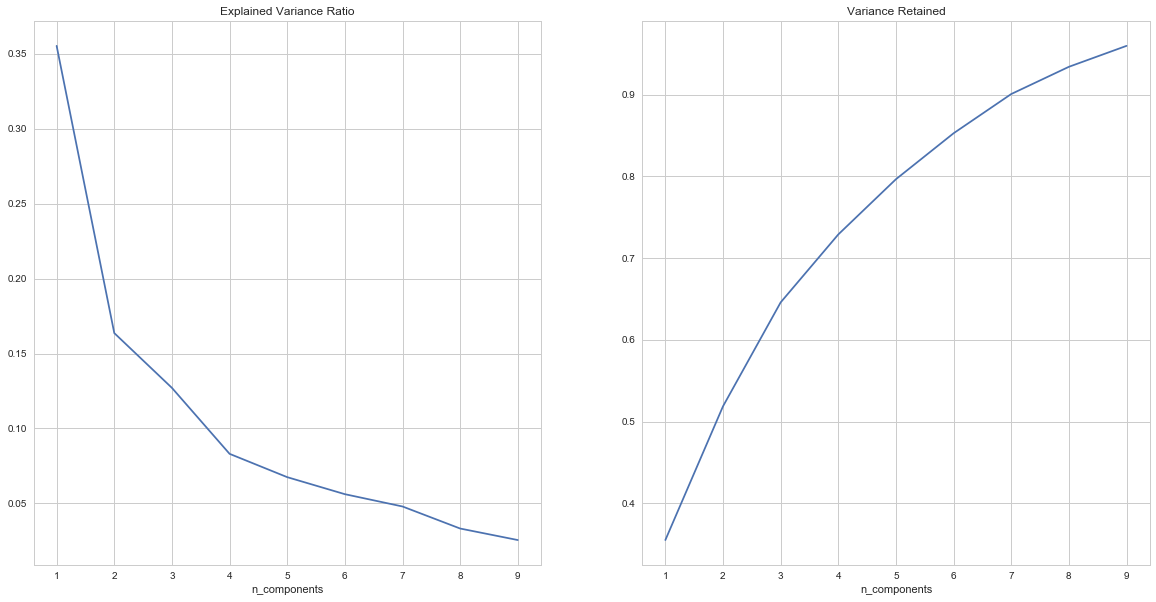

In [111]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.xlabel('n_components')
plt.title('Explained Variance Ratio')
plt.plot(np.arange(1,10), nb_of_components)

plt.subplot(122)
plt.xlabel('n_components')
plt.title('Variance Retained')
plt.plot(np.arange(1,10), nb_of_components.cumsum())

By using the attribute explained_variance_ratio_, we can see that the first principal component contains 35.51% of the variance and the second principal component contains 16.36% of the variance. However, we can only reduce the dimensionality from 12 to 9. This is important as while I attend to convert original 12-dimensional space into new 9-dimensional space, I lose some of the variance (information) when I do this. So, why does PCA perform not well in this case?

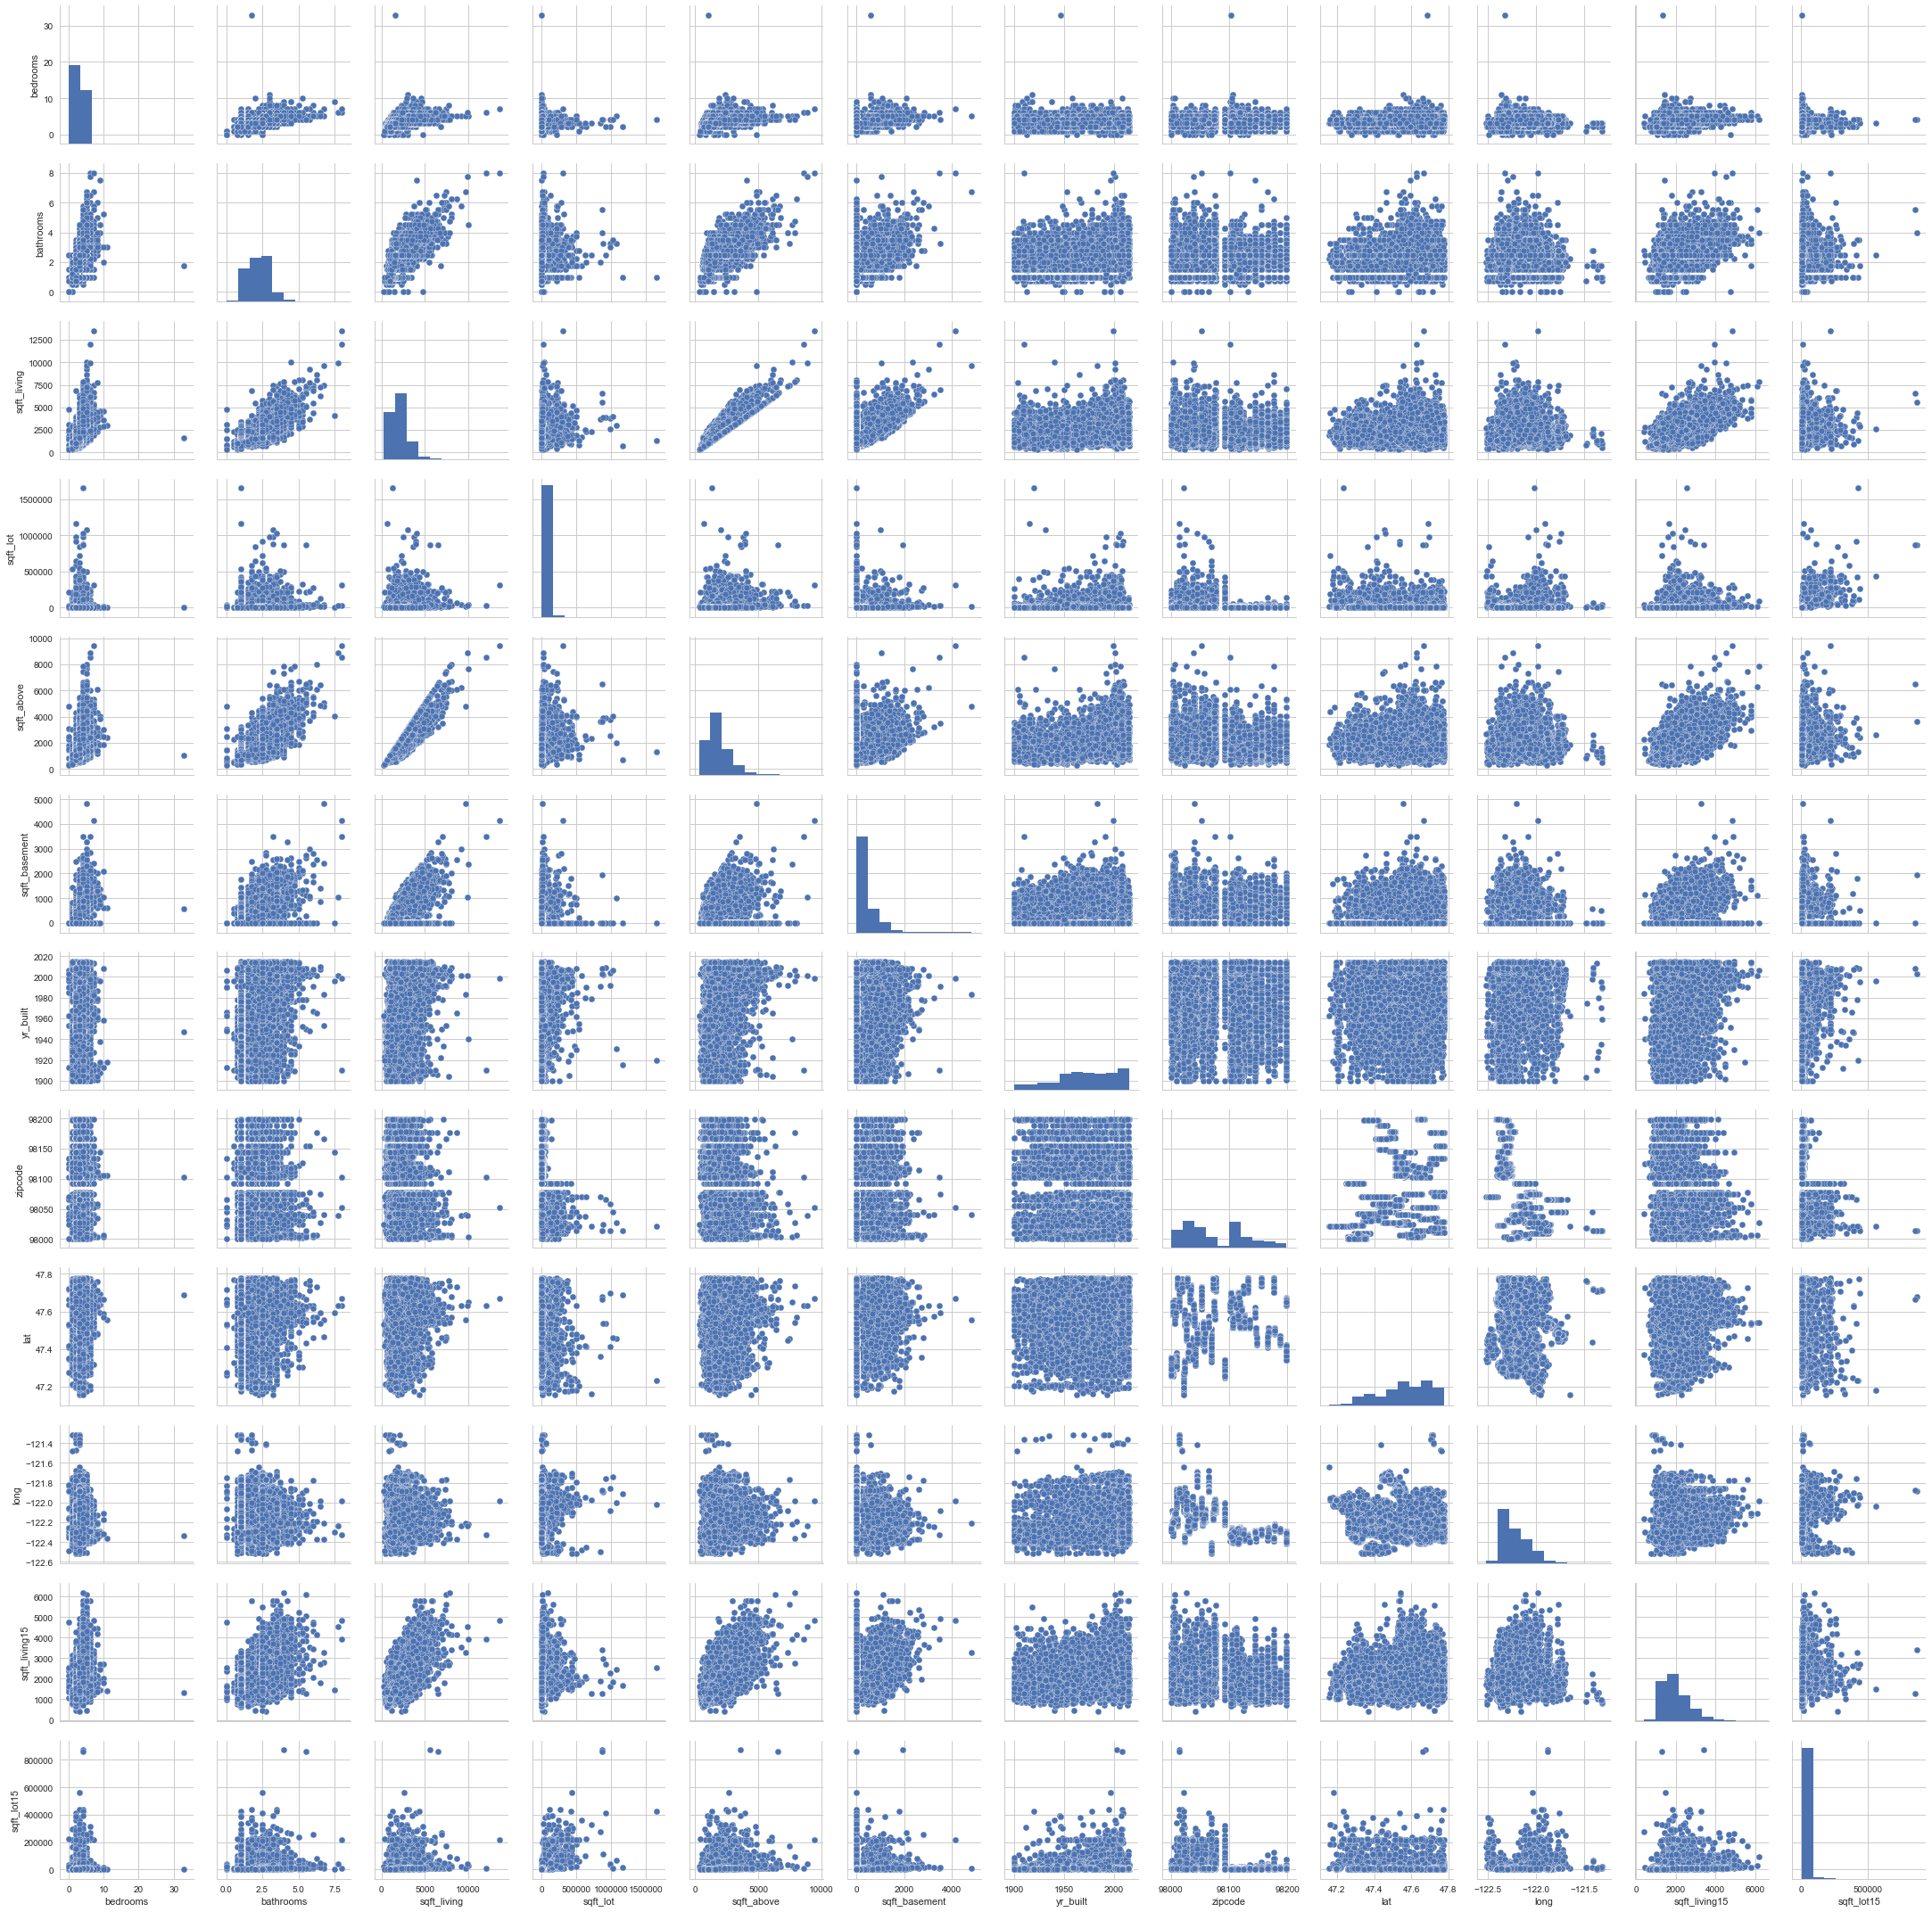

In [112]:
sns.pairplot(df[num])

The relationship between price and each feature.

In [113]:
df[['price']+cat+cat_num+num].corr().sort_values(by=['price'],ascending=False,inplace=False)

,price,waterfront,renovated,floors,view,condition,grade,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.266369,0.126092,0.256794,0.397293,0.036362,0.667434,0.308350,0.525138,0.702035,0.089661,0.605567,0.323816,0.054012,-0.053203,0.307003,0.021626,0.585379,0.082447
sqft_living,0.702035,0.103818,0.055094,0.353949,0.284611,-0.058753,0.762704,0.576671,0.754665,1.000000,0.172826,0.876597,0.435043,0.318049,-0.199430,0.052529,0.240223,0.756420,0.183286
grade,0.667434,0.082775,0.014008,0.458183,0.251321,-0.144674,1.000000,0.356967,0.664983,0.762704,0.113621,0.755923,0.168392,0.446963,-0.184862,0.114084,0.198372,0.713202,0.119248
sqft_above,0.605567,0.072075,0.023178,0.523885,0.167649,-0.158214,0.755923,0.477600,0.685342,0.876597,0.183512,1.000000,-0.051943,0.423898,-0.261190,-0.000816,0.343803,0.731870,0.194050
sqft_living15,0.585379,0.086463,-0.002755,0.279885,0.280439,-0.092824,0.713202,0.391638,0.568634,0.756420,0.144608,0.731870,0.200355,0.326229,-0.279033,0.048858,0.334605,1.000000,0.183192
bathrooms,0.525138,0.063744,0.050260,0.500653,0.187737,-0.124982,0.664983,0.515884,1.000000,0.754665,0.087740,0.685342,0.283770,0.506019,-0.203866,0.024573,0.223042,0.568634,0.087175
view,0.397293,0.401857,0.104062,0.029444,1.000000,0.045990,0.251321,0.079532,0.187737,0.284611,0.074710,0.167649,0.276947,-0.053440,0.084827,0.006157,-0.078400,0.280439,0.072575
sqft_basement,0.323816,0.080588,0.070963,-0.245705,0.276947,0.174105,0.168392,0.303093,0.283770,0.435043,0.015286,-0.051943,1.000000,-0.133124,0.074845,0.110538,-0.144765,0.200355,0.017276
bedrooms,0.308350,-0.006582,0.018553,0.175429,0.079532,0.028472,0.356967,1.000000,0.515884,0.576671,0.031703,0.477600,0.303093,0.154178,-0.152668,-0.008931,0.129473,0.391638,0.029244
lat,0.307003,-0.014274,0.029350,0.049614,0.006157,-0.014941,0.114084,-0.008931,0.024573,0.052529,-0.085683,-0.000816,0.110538,-0.148122,0.267048,1.000000,-0.135512,0.048858,-0.086419


In one-hot encoding, I create a new column for each unique value in that column. Then the value of the column is 1 if the sample has that unique value or 0 otherwise. However, the get_dummies function does not work on categorical variables with numerical data. To trick get_dummies, I have converted the numerical data into strings and then it will work properly.

In [114]:
df[cat_num] = df[cat_num].astype('str')
df[cat_num].head()

,floors,view,condition,grade
0,1.0,0,3,7
1,2.0,0,3,7
2,1.0,0,3,6
3,1.0,0,5,7
4,1.0,0,3,8


Then, in order to transfer the categorical variable into multiple numeric columns, I can send all the columns at once into the get_dummies function and use the column name as the prefix.

In [115]:
df_cat = pd.get_dummies(df[cat],drop_first = True)
df_cat.head()

,waterfront,renovated
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0


In [116]:
df_cat_num = pd.get_dummies(df[cat_num],drop_first = True)
df_cat_num.head()

,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,view_1,view_2,view_3,view_4,condition_2,...,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Moreover, synthesize input and output columns together and got the final data set I will use to build our model.

In [117]:
df_cat_all = pd.concat([df_cat,df_cat_num],axis =1)
df_input = pd.concat([df_cat_all,df[num]],axis =1)
df = pd.concat([df_input,df['OUTPUT']],axis =1)
df.head()

,waterfront,renovated,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,view_1,view_2,view_3,...,sqft_lot,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,OUTPUT
0,0,0,0,0,0,0,0,0,0,0,...,5650,1180,0,1955,98178,47.5112,-122.257,1340,5650,221900.0
1,0,1,0,1,0,0,0,0,0,0,...,7242,2170,400,1951,98125,47.7210,-122.319,1690,7639,538000.0
2,0,0,0,0,0,0,0,0,0,0,...,10000,770,0,1933,98028,47.7379,-122.233,2720,8062,180000.0
3,0,0,0,0,0,0,0,0,0,0,...,5000,1050,910,1965,98136,47.5208,-122.393,1360,5000,604000.0
4,0,0,0,0,0,0,0,0,0,0,...,8080,1680,0,1987,98074,47.6168,-122.045,1800,7503,510000.0


In [118]:
coluse = [c for c in list(df.columns) 
          if c != 'OUTPUT']
print('Number of columns to use:', len(coluse))
coluse

Number of columns to use: 38


['waterfront',
 'renovated',
 'floors_1.5',
 'floors_2.0',
 'floors_2.5',
 'floors_3.0',
 'floors_3.5',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [119]:
print('Total number of features:', len(list(df[num].columns) + list(df_cat_all.columns)))
print('Numerical Features:',len(list(df[num].columns)))
print('Categorical Features:',len(list(df_cat_all.columns)))

Total number of features: 38
Numerical Features: 12
Categorical Features: 26


# Sampling

First of all, I attempt to shuffle the samples in terms of there was some order which could interfere with modeling. If the data ordering is not arbitrary (e.g. samples with the same class label are contiguous), shuffling it first may be essential to get a meaningful cross- validation result. Then, use random_state to make sure each time I got the same result since we randomly shuffle our data set. Typically the train test split is 80% training and 20% test. In this scenario, I'd like to use the `sample` function to separate my original data into three parts: training, validating and testing with the proportion of 70%, 15%, and 15% respectively.

In [120]:
df = df.sample(n = len(df), random_state = 42).reset_index(drop = True)

df_valid_test=df.sample(frac=0.30,random_state=42)
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)
df_train=df.drop(df_valid_test.index)

Separate into X input and y output


In [121]:
X_train = df_train[coluse].values
X_valid = df_valid[coluse].values
X_test = df_test[coluse].values

y_train = df_train['OUTPUT'].values
y_valid = df_valid['OUTPUT'].values
y_test = df_test['OUTPUT'].values

print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)
print('Test shapes:',X_test.shape, y_test.shape)

Training shapes: (15129, 38) (15129,)
Validation shapes: (3242, 38) (3242,)
Test shapes: (3242, 38) (3242,)


# Scaling

Sometimes, machine learning models, such as Logistic Regression are sensitive to the scaling of features (normalization). Therefore, I am supposed to use Standard Scaler function to put all data into the identical mean and variance values. Feature scaling through standardization (or Z-score normalization) can be an important preprocessing step for many machine learning algorithms. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.

In [122]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)

import pickle
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

# load the scaler
scaler = pickle.load(open(scalerfile, 'rb'))

# Apply transform to both the training set and the test set.
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

# Prepare for evaluation

In [123]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score
def adj_r2_score(y,y_pred,x):
    return (1 - (1-r2_score(y, y_pred))*(len(y)-1)/(len(y)-x.shape[1]-1))
def regression_evaluation(y,y_pred,x):
    Adj_R_square = adj_r2_score(y,y_pred,x)
    print('adjusted R square: %.3f' % Adj_R_square)
    return Adj_R_square

# Modeling

# 1. Ordinary Least Squares

In [124]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
t1 = time.time()

regr.fit(X_train_tf, y_train)
y_pred_train_regr = regr.predict(X_train_tf)
y_pred_valid_regr = regr.predict(X_valid_tf)

t2 = time.time()
print(t2-t1)

print(regr)

0.05707550048828125
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [125]:
print('Training:')
train_ols_Adj_R_square = regression_evaluation(y_train,y_pred_train_regr,X_train)
print('Valid:')
test_ols_Adj_R_square = regression_evaluation(y_valid,y_pred_valid_regr,X_train)

Training:
adjusted R square: 0.730
Valid:
adjusted R square: 0.737


C:\Users\sam\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\sam\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


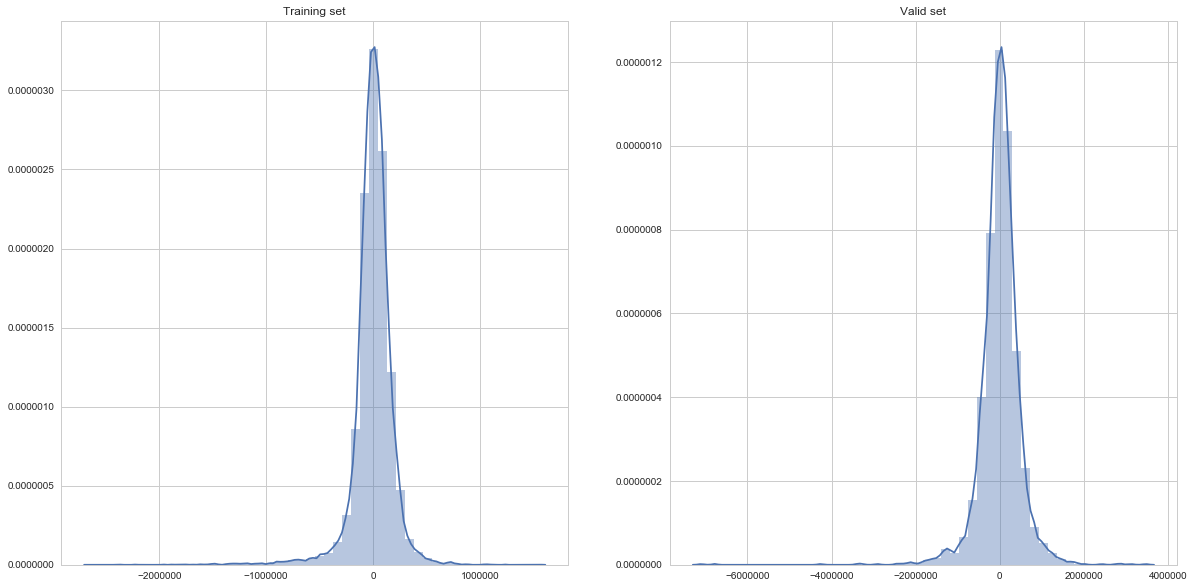

In [126]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title('Training set')
sns.distplot(y_pred_train_regr-y_train)

plt.subplot(122)
plt.title('Valid set')
sns.distplot(y_pred_valid_regr-y_test)

# 2. Lasso Regression

In [128]:
Lasso = linear_model.Lasso(50)
t1 = time.time()

Lasso.fit(X_train_tf, y_train)
y_pred_train_Lasso = Lasso.predict(X_train_tf)
y_pred_valid_Lasso = Lasso.predict(X_valid_tf)

t2 = time.time()
print(t2-t1)

print(Lasso)

0.6386044025421143
Lasso(alpha=50, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


In [129]:
print('Training:')
train_lasso_Adj_R_square = regression_evaluation(y_train,y_pred_train_Lasso,X_train)
print('Valid:')
test_lasso_Adj_R_square = regression_evaluation(y_valid,y_pred_valid_Lasso,X_train)

Training:
adjusted R square: 0.730
Valid:
adjusted R square: 0.737


# 3. Ridge Regression

In [130]:
ridge = linear_model.Ridge()
t1 = time.time()

ridge.fit(X_train_tf, y_train)
y_pred_train_ridge = ridge.predict(X_train_tf)
y_pred_valid_ridge = ridge.predict(X_valid_tf)

t2 = time.time()
print(t2-t1)

print(ridge)

0.025288820266723633
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


Ridge regression enforces the β coefficients to be lower, but it does not enforce them to be zero. That is, it will not get rid of irrelevant features but rather minimize their impact on the trained model.
However, compared with Ridge regression, the only difference from Lasso regression is that the regularization term is in absolute value. But this difference has a huge impact on the trade-off. Lasso method overcomes the disadvantage of Ridge regression by not only punishing high values of the coefficients β but actually setting them to zero if they are not relevant.

In [131]:
print('Training:')
train_ridge_Adj_R_square = regression_evaluation(y_train,y_pred_train_ridge,X_train)
print('Valid:')
test_ridge_Adj_R_square = regression_evaluation(y_valid,y_pred_valid_ridge,X_train)

Training:
adjusted R square: 0.730
Valid:
adjusted R square: 0.737


# 4.Decision Tree

In [132]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
t1 = time.time()

tree.fit(X_train_tf, y_train)
y_pred_train_tree = tree.predict(X_train_tf)
y_pred_valid_tree = tree.predict(X_valid_tf)

t2 = time.time()
print(t2-t1)

print(tree)

0.45196008682250977
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')


In [133]:
print('Training:')
train_tree_Adj_R_square = regression_evaluation(y_train,y_pred_train_tree,X_train)
print('Valid:')
test_tree_Adj_R_square = regression_evaluation(y_valid,y_pred_valid_tree,X_train)

Training:
adjusted R square: 0.999
Valid:
adjusted R square: 0.732


# 5. RandomForestRegressor

In [134]:
from sklearn import ensemble
regr_RF = ensemble.RandomForestRegressor(random_state=42)
t1 = time.time()

regr_RF.fit(X_train_tf, y_train)
y_pred_train_RF = regr_RF.predict(X_train_tf)
y_pred_valid_RF = regr_RF.predict(X_valid_tf)

t2 = time.time()
print(t2-t1)

print(regr_RF)

2.9545037746429443
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)


In [135]:
print('Training:')
train_rfr_Adj_R_square = regression_evaluation(y_train,y_pred_train_RF,X_train)
print('Valid:')
test_rfr_Adj_R_square = regression_evaluation(y_valid,y_pred_valid_RF,X_train)

Training:
adjusted R square: 0.974
Valid:
adjusted R square: 0.862


# 6. GradientBoostingRegressor

In [136]:
regr_GB = ensemble.GradientBoostingRegressor()
t1 = time.time()

regr_GB.fit(X_train_tf, y_train)
y_pred_train_GB = regr_GB.predict(X_train_tf)
y_pred_valid_GB = regr_GB.predict(X_valid_tf)

t2 = time.time()
print(t2-t1)

print(regr_GB)

3.7338318824768066
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)


In [137]:
print('Training:')
train_gbr_Adj_R_square = regression_evaluation(y_train,y_pred_train_GB,X_train)
print('Valid:')
test_gbr_Adj_R_square = regression_evaluation(y_valid,y_pred_valid_GB,X_train)

Training:
adjusted R square: 0.894
Valid:
adjusted R square: 0.872


# Analyze the results of baseline models 

In [138]:
df_results = pd.DataFrame({'classifier':['OLS','OLS','Lasso','Lasso','Ridge','Ridge','DT','DT','RF','RF','GB','GB'],
                           'data_set':['train','test']*6,
                          'Adjusted R square':[train_ols_Adj_R_square,test_ols_Adj_R_square,
                                               train_lasso_Adj_R_square,test_lasso_Adj_R_square,
                                               train_ridge_Adj_R_square,test_ridge_Adj_R_square,
                                               train_tree_Adj_R_square,test_tree_Adj_R_square,
                                               train_rfr_Adj_R_square,test_rfr_Adj_R_square,
                                               train_gbr_Adj_R_square,test_gbr_Adj_R_square]})
df_results

,classifier,data_set,Adjusted R square
0,OLS,train,0.729779
1,OLS,test,0.737325
2,Lasso,train,0.729756
3,Lasso,test,0.737320
4,Ridge,train,0.729779
5,Ridge,test,0.737309
6,DT,train,0.999387
7,DT,test,0.732116
8,RF,train,0.973798
9,RF,test,0.862041


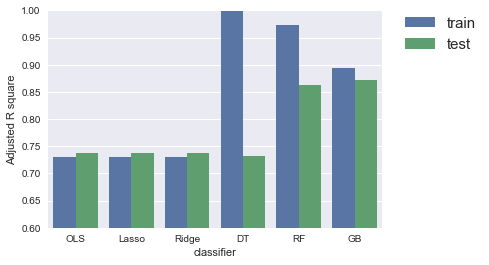

In [139]:
sns.set(style="darkgrid")
sns.barplot(x="classifier", y="Adjusted R square", hue="data_set", data=df_results)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.ylim(.6, 1)
plt.show()

Random Forest Regressor and Gradient Boosting Regressor are better than other three linear regression models.

# Learning Curve

363.5497500896454


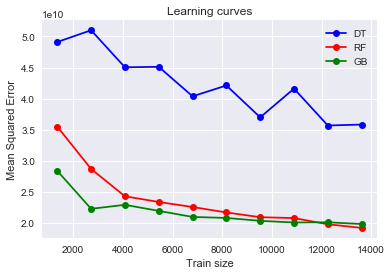

In [140]:
from sklearn.model_selection import learning_curve
tree = DecisionTreeRegressor()
regr_RF = ensemble.RandomForestRegressor(random_state=42)
regr_GB = ensemble.GradientBoostingRegressor()
t1 = time.time()

train_sizes, train_scores_dt, test_scores_dt = learning_curve(tree, X_train_tf, y_train, train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)
train_sizes, train_scores_rf, test_scores_rf = learning_curve(regr_RF, X_train_tf, y_train, train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)
train_sizes_abs, train_scores_gb, test_scores_gb = learning_curve(regr_GB, X_train_tf, y_train, train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)
t2 = time.time()
print(t2-t1)

plt.plot(train_sizes, -test_scores_dt.mean(1), 'o-', color="b",label="DT")
plt.plot(train_sizes, -test_scores_rf.mean(1), 'o-', color="r",label="RF")
plt.plot(train_sizes, -test_scores_gb.mean(1), 'o-', color="g",label="GB")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title('Learning curves')
plt.legend(loc="best")

plt.show()

# Hyperparameter tuning

For hyperparameter tuning, basically, there are two common approaches to conduct this process: 1. Grid search training a model for each combination of parameter options with high running time; 2. Random Search picking a few number combinations with randomly sampling the distributions. The second method could largely reduce the running time. Thus, I'd like to use the second one. There are three important parameters in RandomizedSearchCV: scoring = evaluation metric used to pick the best model, n_iter = number of combinations we used, and cv = number of data sets we used after using cross-validation splits. Cross-validation is a technique for splitting the data multiple times to get a better estimate of the performance metric. Apparently, we can adjust the last two value to leverage run-time based on the time and space we have. The more numbers of combinations we used and the number of data sets we select after using cross-validation splits the more chance we could get ride of underfitting and vice versa. Meanwhile, the number of variables and grid size could also serve as an important role in the impact of running time. In this case, I choose 20 hyperparameters' combinations, 2 datasets in K-Folds, and set auc_scoring as the measurement standard in scoring.

In the hyperparameter tuning, I'd like to introduce one of the hyperparameter: max depth, in Decision Tree. Typically, it means the maximum depth of the tree. If we don't define it, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. As we all know, single decision tree overfits very easily (i.e. memorizes training data). Thus, we are supposed to define the value of max depth in a less value, such as 10. However, if the value is far smaller, it results in underfitting. Thus, the key for defining this hyperparameter is balancing this value. Apparently, there are tons of hyperparameter for each kind of algorithm. This time, I'd like to use two models which have performed better in the baseline models: RandomForest and GradientBoostingClassifier.

# RandomForestRegressor

In [102]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees
n_estimators = range(100,500,100)
# maximum number of features to use at each split
max_features = ['auto','sqrt','log2']
# maximum depth of the tree
max_depth = range(2,20,2)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
min_samples_leaf =range(1,4,2)
bootstrap = [True, False]
# random grid
random_grid = {'n_estimators': n_estimators,
                           'max_features': max_features,
                           'max_depth': max_depth,
                           'min_samples_split': min_samples_split,
                           'min_samples_leaf': min_samples_leaf,
                           'bootstrap': bootstrap,}

regr_RF = ensemble.RandomForestRegressor(random_state=42)
# create the randomized search cross-validation
regr_RF_random = RandomizedSearchCV(estimator = regr_RF, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 10,scoring='neg_mean_squared_error', n_jobs=-1,
                               verbose = 0, random_state = 42)
# fit the random search model
t1 = time.time()
regr_RF_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

regr_RF_random.best_params_

2581.926459312439


{'n_estimators': 300,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 14,
 'bootstrap': True}

In [141]:
regr_RF_best = ensemble.RandomForestRegressor(n_estimators=300,min_samples_split=4,min_samples_leaf=1,max_features='auto',
                                         max_depth=14,bootstrap=True,random_state=42)
regr_RF_best.fit(X_train_tf, y_train)
y_pred_train_RF_best = regr_RF_best.predict(X_train_tf)
y_pred_valid_RF_best = regr_RF_best.predict(X_valid_tf)

print('Training:')
train_rfrb_Adj_R_square = regression_evaluation(y_train,y_pred_train_RF_best,X_train)
print('Valid:')
talid_rfrb_Adj_R_square = regression_evaluation(y_valid,y_pred_valid_RF_best,X_train)

Training:
adjusted R square: 0.965
Valid:
adjusted R square: 0.877


# GradientBoostingRegressor

In [152]:
n_estimators = range(100,500,100)
max_depth = range(1,10,1)
learning_rate = [0.001,0.003,0.01,0.03,0.1,0.3]
alpha = [0.001,0.003,0.01,0.03,0.1,0.3]

random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate,
                  'alpha':alpha}

regr_GB_random = ensemble.GradientBoostingRegressor(random_state=42)
regr_GB_random = RandomizedSearchCV(estimator = regr_GB_random, 
                               param_distributions = random_grid_gbc, 
                               n_iter = 100, 
                               cv = 10,scoring='neg_mean_squared_error', n_jobs=-1,
                               verbose = 0, random_state = 42)
t1 = time.time()
regr_GB_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

regr_GB_random.best_params_

5173.3937883377075


{'n_estimators': 400, 'max_depth': 4, 'learning_rate': 0.1, 'alpha': 0.01}

In [142]:
regr_GB_best = ensemble.GradientBoostingRegressor(n_estimators=400,learning_rate=0.1, alpha=0.01,max_depth=4)
regr_GB_best.fit(X_train_tf, y_train)
y_pred_train_GB_best = regr_GB_best.predict(X_train_tf)
y_pred_valid_GB_best = regr_GB_best.predict(X_valid_tf)

print('Training:')
train_gbrb_Adj_R_square = regression_evaluation(y_train,y_pred_train_GB_best,X_train)
print('Valid:')
talid_gbrb_Adj_R_square = regression_evaluation(y_valid,y_pred_valid_GB_best,X_train)

Training:
adjusted R square: 0.960
Valid:
adjusted R square: 0.904


# Analyze optimized results with baseline model

In [63]:
df_results = pd.DataFrame({'classifier':['RF','RF','GB','GB','RF_tuned','RF_tuned','GB_tuned','GB_tuned'],
                           'data_set':['train','valid']*4,
                          'Adjusted R square':[train_rfr_Adj_R_square,test_rfr_Adj_R_square,
                                               train_gbr_Adj_R_square,test_gbr_Adj_R_square,
                                               train_rfrb_Adj_R_square,talid_rfrb_Adj_R_square,
                                               train_gbrb_Adj_R_square,talid_gbrb_Adj_R_square]})
df_results

,classifier,data_set,Adjusted R square
0,RF,train,0.973798
1,RF,valid,0.862041
2,GB,train,0.894042
3,GB,valid,0.870440
4,RF_tuned,train,0.965204
5,RF_tuned,valid,0.877100
6,GB_tuned,train,0.959534
7,GB_tuned,valid,0.903653


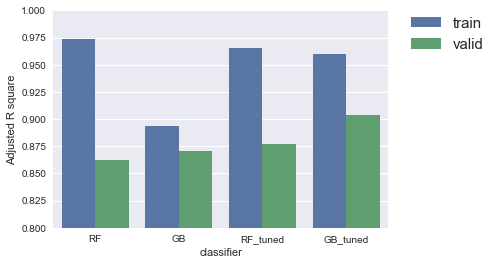

In [64]:
sns.set(style="darkgrid")
sns.barplot(x="classifier", y="Adjusted R square", hue="data_set", data=df_results)
plt.ylim(.8,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

After hyperparameter tuning, though the high variance issue is changed in Random Forest Regression model, the generalization ability didn't improve much. However, in GradientBoostingRegressor, both the high variance issue and the generalization ability are improved.

# Feature Importance

One path for improving your models to understand what features are important to my models. This can usually only be investigated for simpler models such as Logistic Regression or Random Forests. This analysis can help in a few areas:

- inspire new feature ideas --> helps with both high bias and high variance
- obtain a list of the top features to be used for feature reduction --> helps with high variance
- point out errors in our pipeline --> helps with robustness of model

In this case, I'd like to investigate feature importance for our best GradientBoostingRegressor model. The feature importance shows how often a particular feature was used to split the data. In this case, we don't know if a particular feature is correlated with the positive class or negative class, but rather it is just importance for making a decision.

We can extract the coefficients using coef_ and store in a new dataframe (sorted by importance)

In [65]:
feature_importances =pd.DataFrame(regr_GB_best.feature_importances_,
                                  index = coluse,columns=['importance']).sort_values('importance',ascending=False)
feature_importances.head()

,importance
lat,0.125780
long,0.115213
sqft_living,0.099432
sqft_living15,0.091039
sqft_above,0.083195


We can visualize the importance of each feature in this dataframe.

In [66]:
def feature_top_importances(num,feature_importances,model_name):
    ylocs = np.arange(num)
    # get the feature importance for top num and sort in reverse order
    values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
    feature_labels = list(feature_importances.iloc[:num].index)[::-1]
    plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k');
    plt.barh(ylocs, values_to_plot, align = 'center')
    plt.ylabel('Features')
    plt.xlabel('Importance Score')
    plt.title('Feature Importance Score - '+model_name)
    plt.yticks(ylocs, feature_labels)
    plt.show()

I'd like to visualize the top 10 important feature in our best GradientBoostingRegressor model.

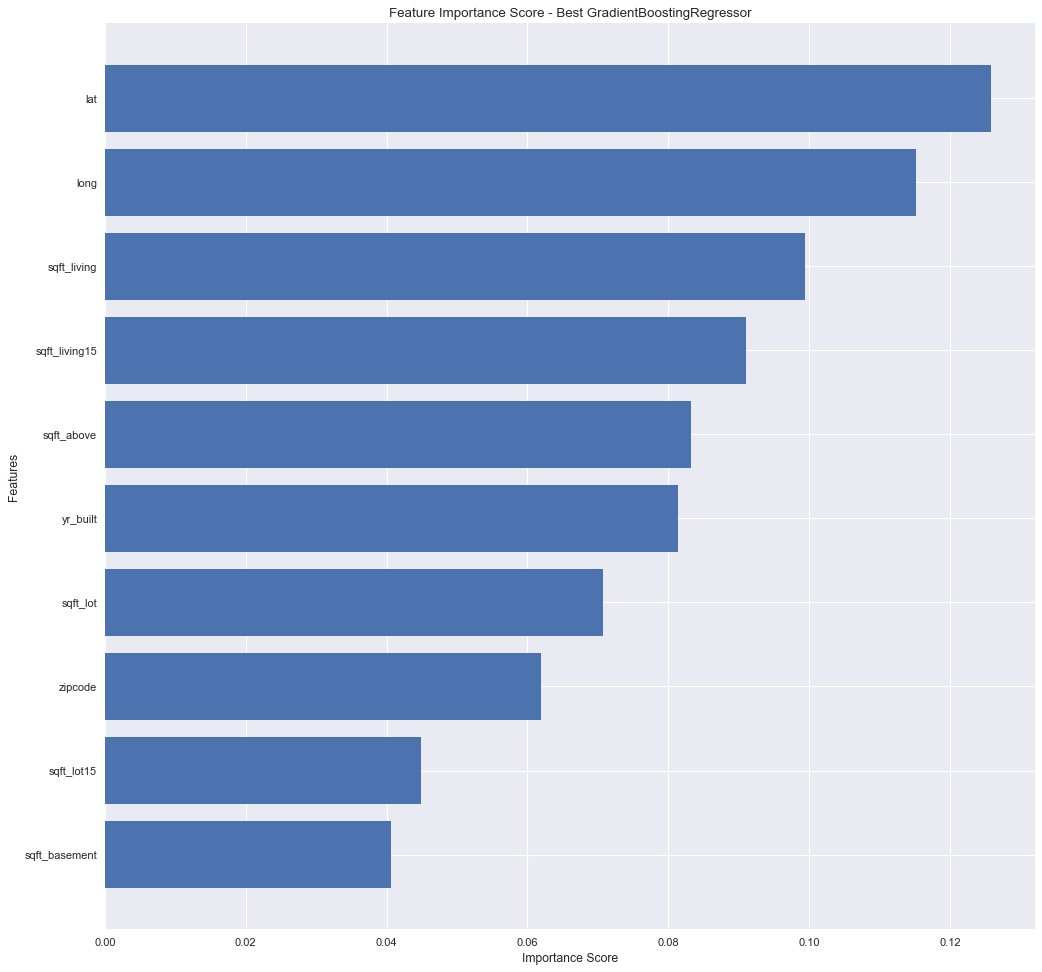

In [67]:
feature_top_importances(10,feature_importances,'Best GradientBoostingRegressor')

Evaluate model in test set

In [69]:
y_pred_train_GB_best = regr_GB_best.predict(X_train_tf)
y_pred_valid_GB_best = regr_GB_best.predict(X_valid_tf)
y_pred_test_GB_best = regr_GB_best.predict(X_test_tf)

print('Training:')
train_gbrb_Adj_R_square = regression_evaluation(y_train,y_pred_train_GB_best,X_train)
print('Valid:')
valid_gbrb_Adj_R_square = regression_evaluation(y_valid,y_pred_valid_GB_best,X_train)
print('Test:')
test_gbrb_Adj_R_square = regression_evaluation(y_test,y_pred_test_GB_best,X_train)

Training:
adjusted R square: 0.960
Valid:
adjusted R square: 0.904
Test:
adjusted R square: 0.889


In [70]:
y_pred_test_GB_best_df = pd.DataFrame(np.array([y_test,y_pred_test_GB_best]).T,columns=['y test actual','y test predict'])
y_pred_test_GB_best_df.head()

,y test actual,y test predict
0,1005000.0,8.745606e+05
1,245000.0,2.710336e+05
2,736500.0,8.047539e+05
3,429592.0,6.690626e+05
4,1285000.0,1.327805e+06
